In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
vendas = read_csv('./dados/vendas_sp_2017_relevantes_enriquecido_preco_log.csv')

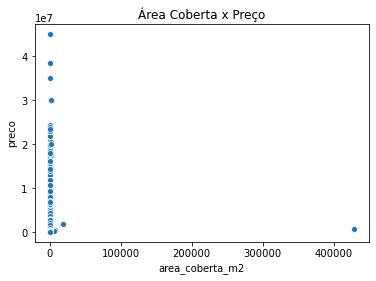

In [3]:
sns.scatterplot(x='area_coberta_m2', y='preco', data=vendas)
plt.title('Área Coberta x Preço')
plt.show()

In [4]:
vendas[vendas.area_coberta_m2 >= 400000]

data_criacao tipo_propriedade      local  \
39861   2017-06-09        apartment  Jabaquara   

                              local_detalhado        lat       lon     preco  \
39861  |Brasil|São Paulo|São Paulo|Jabaquara| -23.641865 -46.63427  790000.0   

       area_coberta_m2  preco_m2  comodos  gastos  \
39861         429030.0  1.841363      1.0   580.0   

                                               descricao  tem_vaga  \
39861  EXCELENTE LOCALIZAÇÃO!    PRÓXIMO DE 2 METRÔS ...       1.0   

       tem_piscina  num_quartos  preco_log  
39861          1.0            0  13.579788

In [5]:
vendas = vendas[vendas.area_coberta_m2 <= 100000]

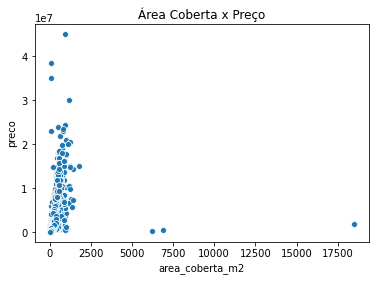

In [6]:
sns.scatterplot(x='area_coberta_m2', y='preco', data=vendas)
plt.title('Área Coberta x Preço')
plt.show()

In [7]:
vendas[vendas.area_coberta_m2 >= 5000]

data_criacao tipo_propriedade              local  \
23221   2017-05-23        apartment       Vila Andrade   
52239   2017-06-25        apartment     Jardim Celeste   
58060   2017-10-25        apartment  Alto da Boa Vista   
58065   2017-10-26        apartment  Alto da Boa Vista   

                                      local_detalhado        lat        lon  \
23221       |Brasil|São Paulo|São Paulo|Vila Andrade| -23.623623 -46.734592   
52239     |Brasil|São Paulo|São Paulo|Jardim Celeste| -23.656509 -46.612530   
58060  |Brasil|São Paulo|São Paulo|Alto da Boa Vista| -23.643425 -46.697880   
58065  |Brasil|São Paulo|São Paulo|Alto da Boa Vista| -23.643425 -46.697880   

           preco  area_coberta_m2    preco_m2  comodos  gastos  \
23221   505000.0           6900.0   73.188406      2.0   820.0   
52239   249000.0           6200.0   40.161290      1.0   590.0   
58060  2000000.0          18500.0  108.108108      3.0  2200.0   
58065  2000000.0          18500.0  108.108108      3.0  2200.0   

                                               descricao  tem_vaga  \
23221  Apartamento pronto para morar - armários embut...       0.0   
52239  ARMÁRIOS PLANEJADOS DE ÓTIMA QUALIDADE  LAZER:...       1.0   
58060  Belíssimo apartamento em localização privilegi...       1.0   
58065  Belíssimo apartamento em localização privilegi...       1.0   

       tem_piscina  num_quartos  preco_log  
23221          1.0            0  13.132314  
52239          0.0            0  12.425208  
58060          0.0            0  14.508658  
58065          0.0            0  14.508658

In [8]:
vendas = vendas[vendas.area_coberta_m2 <= 5000]

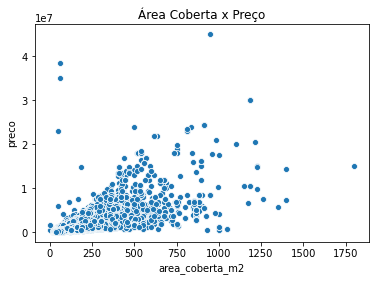

In [9]:
sns.scatterplot(x='area_coberta_m2', y='preco', data=vendas)
plt.title('Área Coberta x Preço')
plt.show()

In [10]:
modelo = LinearRegression()

In [11]:
x = vendas[['area_coberta_m2']]
y = vendas[['preco']]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=6)

In [13]:
modelo.fit(x_train, y_train)

LinearRegression()

In [14]:
previsao = modelo.predict(x_test)

In [15]:
print(f'R2: {r2_score(y_test, previsao)}')
print(f'MSE: {mean_squared_error(y_test, previsao)}')

R2: 0.5677684457439653
MSE: 711966505443.9481


In [16]:
previsao_treino = modelo.predict(x_train)

In [17]:
print(f'R2: {r2_score(y_train, previsao_treino)}')
print(f'MSE: {mean_squared_error(y_train, previsao_treino)}')

R2: 0.593019615627285
MSE: 552781131109.0049


In [18]:
previsao_total = modelo.predict(vendas[['area_coberta_m2']])

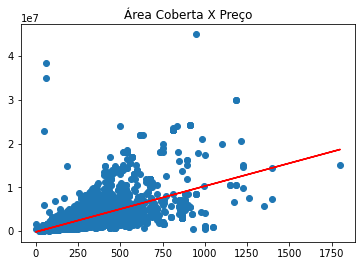

In [19]:
plt.scatter(vendas[['area_coberta_m2']], vendas[['preco']])
plt.title('Área Coberta X Preço')
plt.plot(vendas[['area_coberta_m2']], previsao_total, color='red')
plt.show()

In [20]:
vendas.to_csv('dados/vendas_sp_2017_linear_regression.csv', index=False)

In [21]:
coef = np.polyfit(vendas[['area_coberta_m2']].values.flatten(), vendas[['preco']].values.flatten(), 1)
poly1d_fn = np.poly1d(coef)

In [22]:
def line_fn(row):
    x, y = row['area_coberta_m2'], row['preco']
    result = (modelo.coef_ * x + modelo.intercept_) - y
    return result.flatten()[0]

In [23]:
errors = vendas[['area_coberta_m2', 'preco']].apply(line_fn, axis=1).values.reshape(-1,1)

<ipython-input-24-c9a51f6f7392>:5: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.errorbar(vendas[['area_coberta_m2']], previsao_total, yerr=errors.reshape(-1,1),mfc='red', mec='green', ms=2, mew=4,  marker='s',)


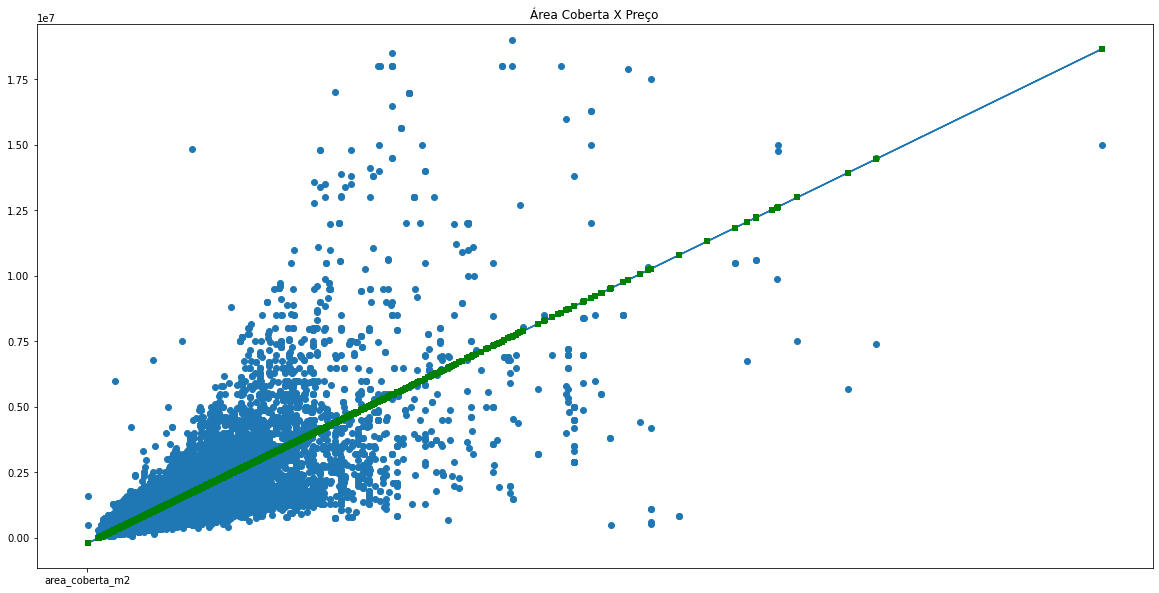

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(vendas[['area_coberta_m2']], vendas[['preco']])
plt.title('Área Coberta X Preço')
# plt.plot(vendas[['area_coberta_m2']], previsao_total, color='red')
plt.errorbar(vendas[['area_coberta_m2']], previsao_total, yerr=errors.reshape(-1,1),mfc='red', mec='green', ms=2, mew=4,  marker='s',)
plt.show()

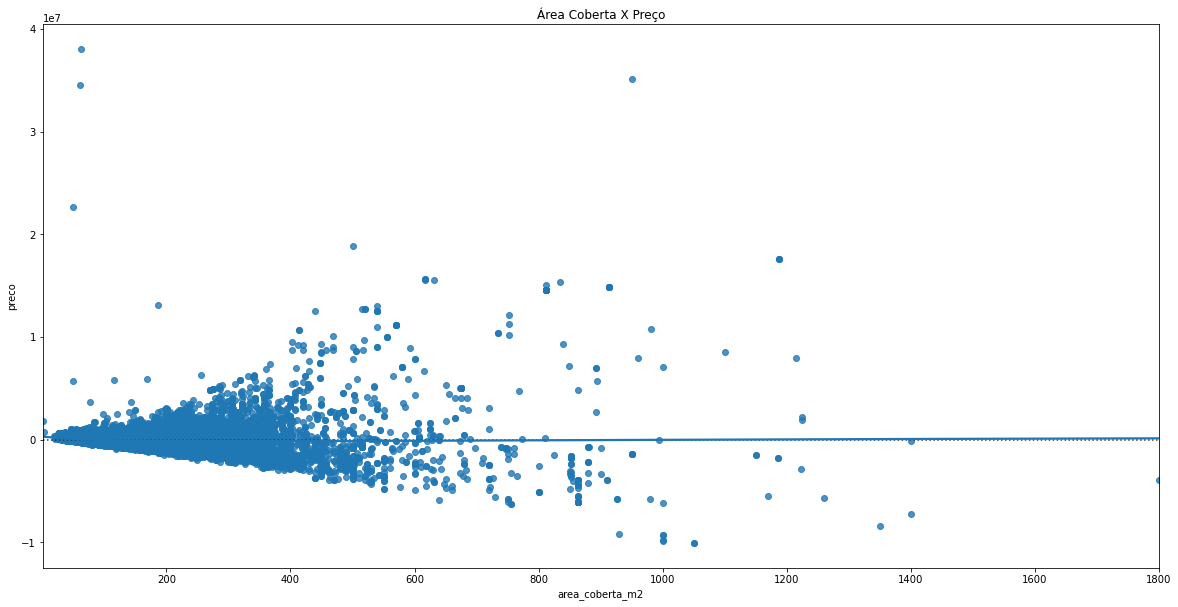

In [25]:
plt.figure(figsize=(20,10))
plt.title('Área Coberta X Preço')

sns.residplot(vendas[['area_coberta_m2']], vendas[['preco']], lowess=True)


plt.show()

In [26]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

/Users/fernando.furtado/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.5677684457439653

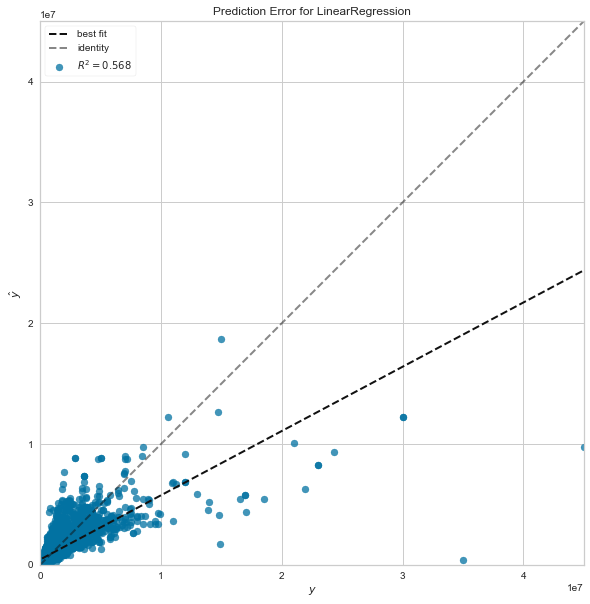

In [27]:

model = LinearRegression()

X,y = vendas[['area_coberta_m2']], vendas['preco']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=6)

plt.figure(figsize=(20,10))

predictionError = PredictionError(model)
predictionError.fit(x_train, y_train)
score = predictionError.score(x_test, y_test)
display(score)
predictionError.show()
plt.show()


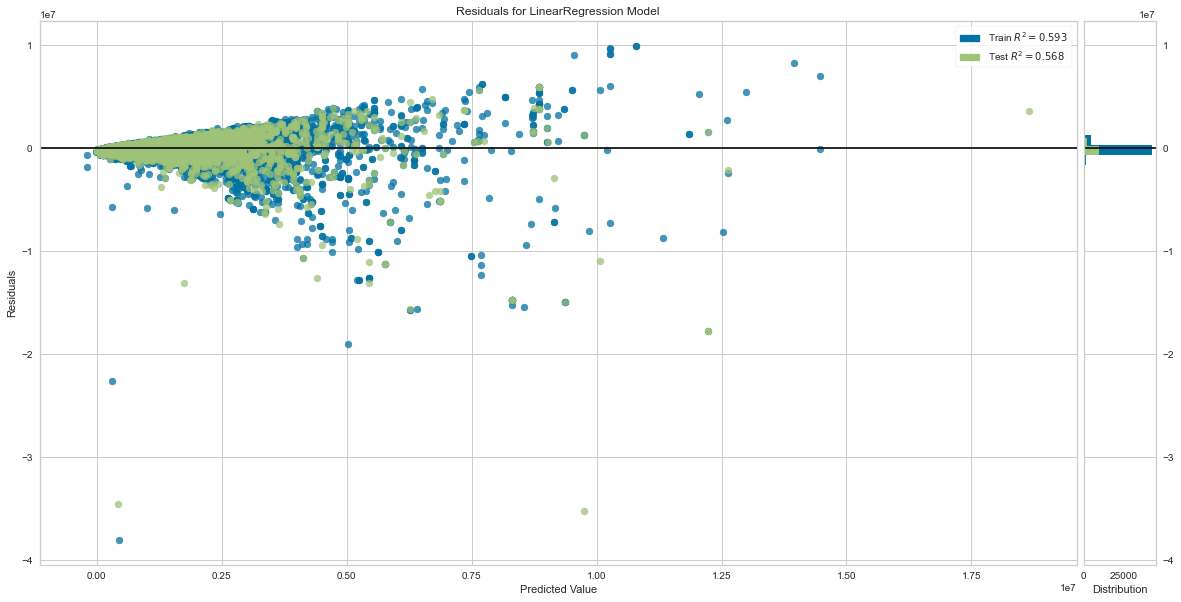

In [28]:
plt.figure(figsize=(20,10))
residual = ResidualsPlot(model, is_fitted=True)
residual.fit(x_train, y_train)
residual.score(x_test, y_test)
residual.show()
plt.show()

In [64]:
model = LinearRegression()
X = vendas[['area_coberta_m2', 'comodos']]
y = vendas['preco_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

predictables = model.predict(X_test)

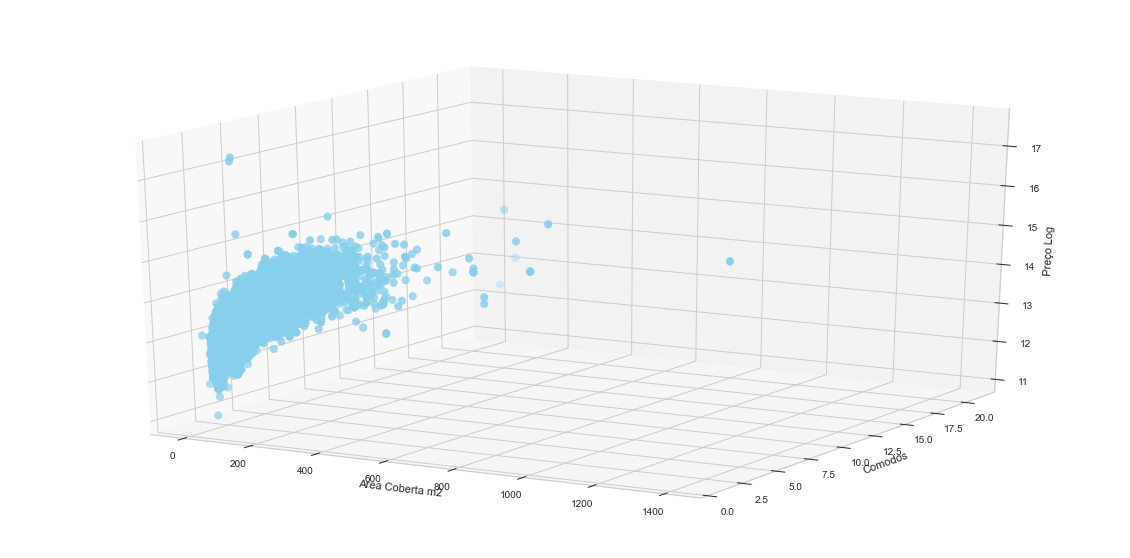

In [91]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(projection='3d')

ax.scatter(xs=X['area_coberta_m2'], ys=X['comodos'], zs=y, s=60, c='skyblue')


ax.set_xlabel('Area Coberta m2')
ax.set_ylabel('Comodos')
ax.set_zlabel('Preço Log')

ax.view_init(20)

plt.show()

In [29]:
vendas

data_criacao tipo_propriedade                                local  \
0       2017-01-13        apartment                              Tatuapé   
1       2017-01-11        apartment                      Jardim Paulista   
2       2017-01-29        apartment                         Vila Lageado   
3       2017-02-18        apartment                   Vila Regente Feijó   
4       2017-02-15        apartment                      Jardim Paulista   
...            ...              ...                                  ...   
62384   2017-08-21        apartment  Conjunto Residencial José Bonifácio   
62385   2017-06-01        apartment  Conjunto Residencial José Bonifácio   
62386   2017-06-01        apartment  Conjunto Residencial José Bonifácio   
62387   2017-08-21        apartment  Conjunto Residencial José Bonifácio   
62388   2017-06-14        apartment  Conjunto Residencial José Bonifácio   

                                         local_detalhado        lat  \
0                   |Brasil|São Paulo|São Paulo|Tatuapé| -23.536985   
1           |Brasil|São Paulo|São Paulo|Jardim Paulista| -23.571201   
2              |Brasil|São Paulo|São Paulo|Vila Lageado| -23.553284   
3        |Brasil|São Paulo|São Paulo|Vila Regente Feijó| -23.559198   
4           |Brasil|São Paulo|São Paulo|Jardim Paulista| -23.566362   
...                                                  ...        ...   
62384  |Brasil|São Paulo|São Paulo|Conjunto Residenci... -23.541996   
62385  |Brasil|São Paulo|São Paulo|Conjunto Residenci... -23.552649   
62386  |Brasil|São Paulo|São Paulo|Conjunto Residenci... -23.552649   
62387  |Brasil|São Paulo|São Paulo|Conjunto Residenci... -23.553461   
62388  |Brasil|São Paulo|São Paulo|Conjunto Residenci... -23.556051   

             lon      preco  area_coberta_m2      preco_m2  comodos  gastos  \
0     -46.573380   530000.0             72.0   7361.111111      2.0   560.0   
1     -46.652710   420000.0             40.0  10500.000000      1.0   827.0   
2     -46.748257   550000.0             70.0   7857.142857      1.0   445.0   
3     -46.570202   700000.0             82.0   8536.585366      1.0   600.0   
4     -46.662746  1150000.0            112.0  10267.857143      2.0  1200.0   
...          ...        ...              ...           ...      ...     ...   
62384 -46.440754   145000.0             60.0   2416.666667      1.0   150.0   
62385 -46.438934   160000.0             52.0   3076.923077      1.0   102.0   
62386 -46.438934   160000.0             52.0   3076.923077      1.0   102.0   
62387 -46.435631   202500.0             48.0   4218.750000      1.0   175.0   
62388 -46.440075   154000.0             40.0   3850.000000      1.0   110.0   

                                               descricao  tem_vaga  \
0      Apartamento todo reformado em ótimo estado .  ...       0.0   
1      .Apartamento JARDIM PAULISTA  com:  40.00 m² d...       1.0   
2      Excelente apartamento no melhor  do Jaguaré , ...       1.0   
3      LINDO APTO (LOCAÇÃO)  Apartamento Novo com 88M...       1.0   
4      O apartamento tem 112 metros quadrados, na par...       0.0   
...                                                  ...       ...   
62384    Editor HTML Online     Imóvel na COHAB  JOSÉ...       1.0   
62385    Editor HTML Online    Conj. Hab. José Bonifá...       1.0   
62386     Editor HTML Online       Conj. Hab. Joseacu...       1.0   
62387    Editor HTML Online     Oportunidade de Negóc...       1.0   
62388  Excelente Apartamento em Itaquera  O imóvel  f...       1.0   

       tem_piscina  num_quartos  preco_log  
0              0.0            0  13.180632  
1              0.0            1  12.948010  
2              0.0            3  13.217674  
3              1.0            0  13.458836  
4              0.0            2  13.955273  
...            ...          ...        ...  
62384          0.0            3  11.884489  
62385          0.0            2  11.982929  
62386          0.0            2  11.982929  


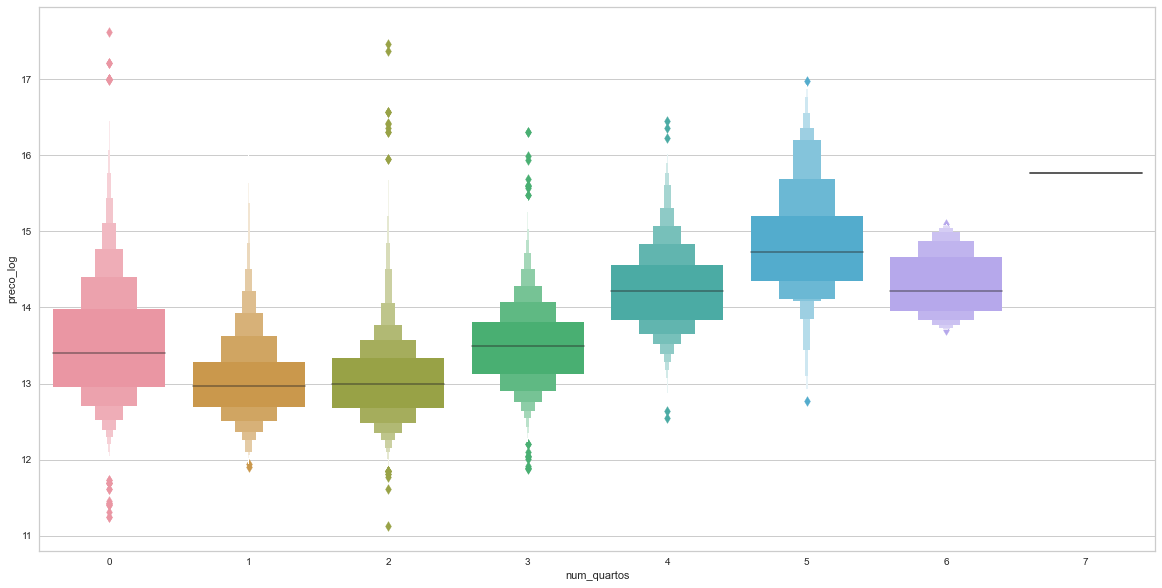

In [30]:
plt.figure(figsize=(20,10))
sns.boxenplot(x='num_quartos', y='preco_log', data=vendas)
plt.show()

In [31]:
vendas = vendas[ vendas.num_quartos > 0 ]

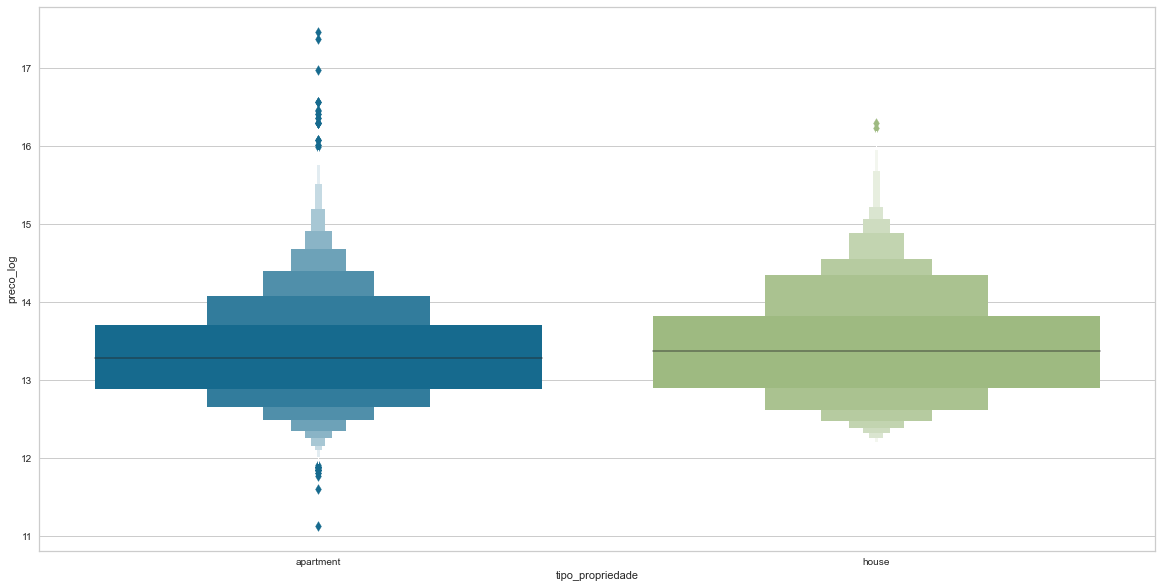

In [32]:
plt.figure(figsize=(20,10))
sns.boxenplot(x='tipo_propriedade', y='preco_log', data=vendas)
plt.show()

In [33]:
import pandas as pd

In [34]:
dummies = pd.get_dummies(vendas.tipo_propriedade)

In [35]:
vendas[['apartment', 'house']] = dummies

/Users/fernando.furtado/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [57]:
vendas.tipo_propriedade.value_counts()

apartment    25353
house         1173
Name: tipo_propriedade, dtype: int64

In [36]:
vendas.corr() # -1, 0, 1

lat       lon     preco  area_coberta_m2  preco_m2  \
lat              1.000000 -0.193322 -0.007366        -0.016229 -0.011258   
lon             -0.193322  1.000000 -0.097326        -0.143583 -0.042906   
preco           -0.007366 -0.097326  1.000000         0.733138  0.556409   
area_coberta_m2 -0.016229 -0.143583  0.733138         1.000000  0.055274   
preco_m2        -0.011258 -0.042906  0.556409         0.055274  1.000000   
comodos         -0.011033 -0.074959  0.387654         0.472687  0.072727   
gastos          -0.004672 -0.002809  0.026142         0.031384  0.003021   
tem_vaga         0.025645  0.046855  0.034644         0.025458  0.013689   
tem_piscina     -0.017430  0.013505  0.054262         0.037824  0.057991   
num_quartos     -0.022003 -0.122229  0.378795         0.550402 -0.001965   
preco_log       -0.020121 -0.202985  0.790474         0.767331  0.331242   
apartment       -0.021094 -0.004355 -0.027376        -0.227371  0.099061   
house            0.021094  0.004355  0.027376         0.227371 -0.099061   

                  comodos    gastos  tem_vaga  tem_piscina  num_quartos  \
lat             -0.011033 -0.004672  0.025645    -0.017430    -0.022003   
lon             -0.074959 -0.002809  0.046855     0.013505    -0.122229   
preco            0.387654  0.026142  0.034644     0.054262     0.378795   
area_coberta_m2  0.472687  0.031384  0.025458     0.037824     0.550402   
preco_m2         0.072727  0.003021  0.013689     0.057991    -0.001965   
comodos          1.000000  0.020635  0.020990     0.076248     0.298042   
gastos           0.020635  1.000000 -0.006125     0.003808     0.021537   
tem_vaga         0.020990 -0.006125  1.000000     0.072248     0.054063   
tem_piscina      0.076248  0.003808  0.072248     1.000000     0.055242   
num_quartos      0.298042  0.021537  0.054063     0.055242     1.000000   
preco_log        0.439241  0.029024  0.037573     0.090667     0.539265   
apartment       -0.058711 -0.023622 -0.009133     0.044669    -0.090597   
house            0.058711  0.023622  0.009133    -0.044669     0.090597   

                 preco_log  apartment     house  
lat              -0.020121  -0.021094  0.021094  
lon              -0.202985  -0.004355  0.004355  
preco             0.790474  -0.027376  0.027376  
area_coberta_m2   0.767331  -0.227371  0.227371  
preco_m2          0.331242   0.099061 -0.099061  
comodos           0.439241  -0.058711  0.058711  
gastos            0.029024  -0.023622  0.023622  
tem_vaga          0.037573  -0.009133  0.009133  
tem_piscina       0.090667   0.044669 -0.044669  
num_quartos       0.539265  -0.090597  0.090597  
preco_log         1.000000  -0.026141  0.026141  
apartment        -0.026141   1.000000 -1.000000  
house             0.026141  -1.000000  1.000000

In [37]:
corr_feature = vendas[['preco_log', 'lat', 'lon', 'area_coberta_m2', 'preco_m2', 'gastos']].corr()

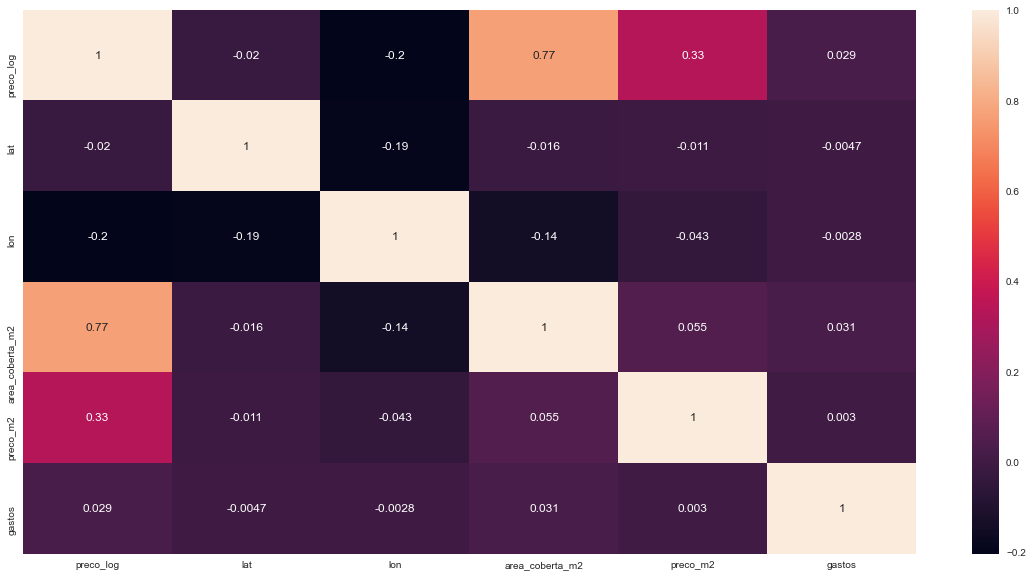

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_feature, annot=True)
plt.show()

<Figure size 1440x720 with 0 Axes>

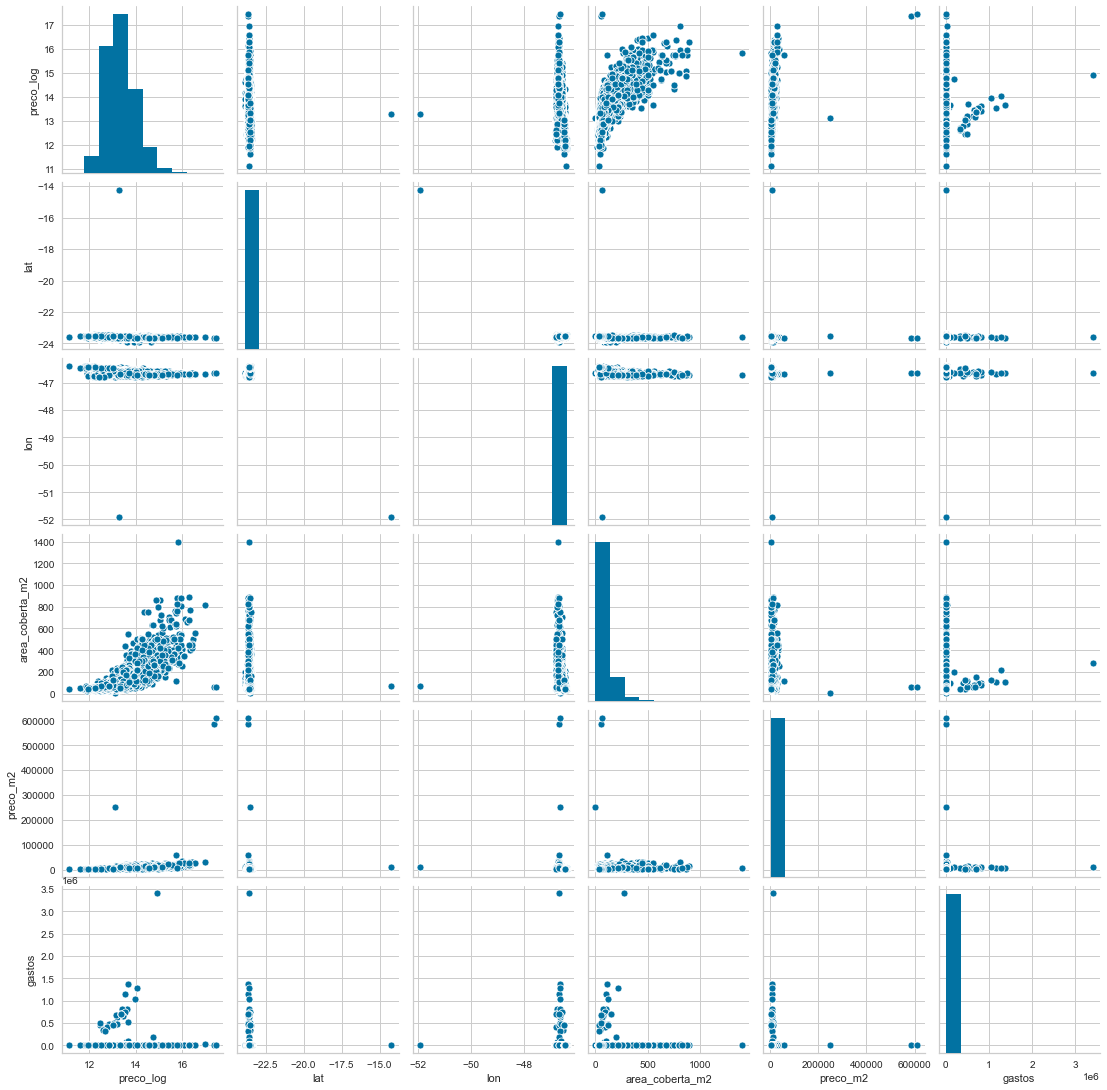

In [39]:
plt.figure(figsize=(20,10))

sns.pairplot(vendas[['preco_log', 'lat', 'lon', 'area_coberta_m2', 'preco_m2', 'gastos']])

plt.show()

In [40]:
vendas = vendas[ vendas.lat < vendas.lat.quantile(.9999) ] 

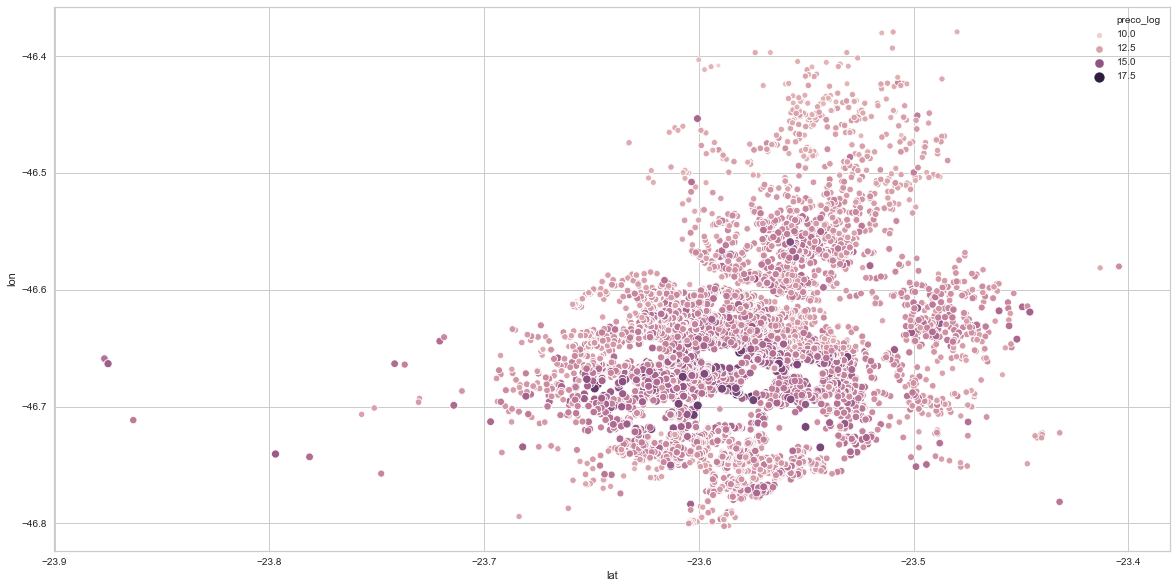

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='lat', y='lon', data=vendas, size='preco_log', hue='preco_log')
plt.show()

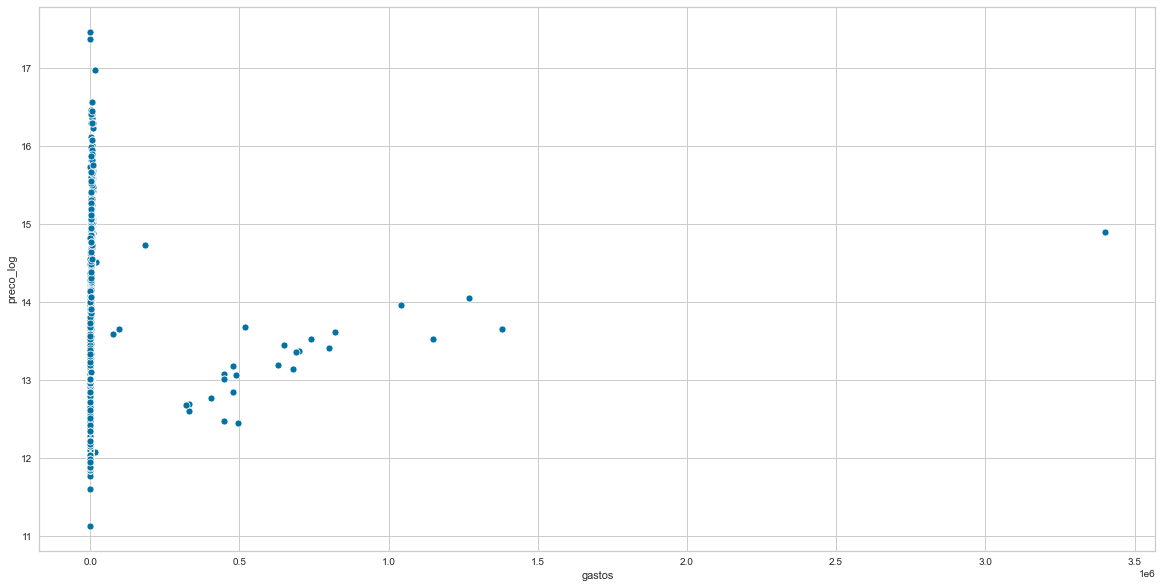

In [42]:
plt.figure(figsize=(20,10))

sns.scatterplot(x='gastos', y='preco_log', data=vendas)
plt.show()

In [43]:
vendas = vendas[ vendas.gastos < vendas.gastos.quantile(.99) ]

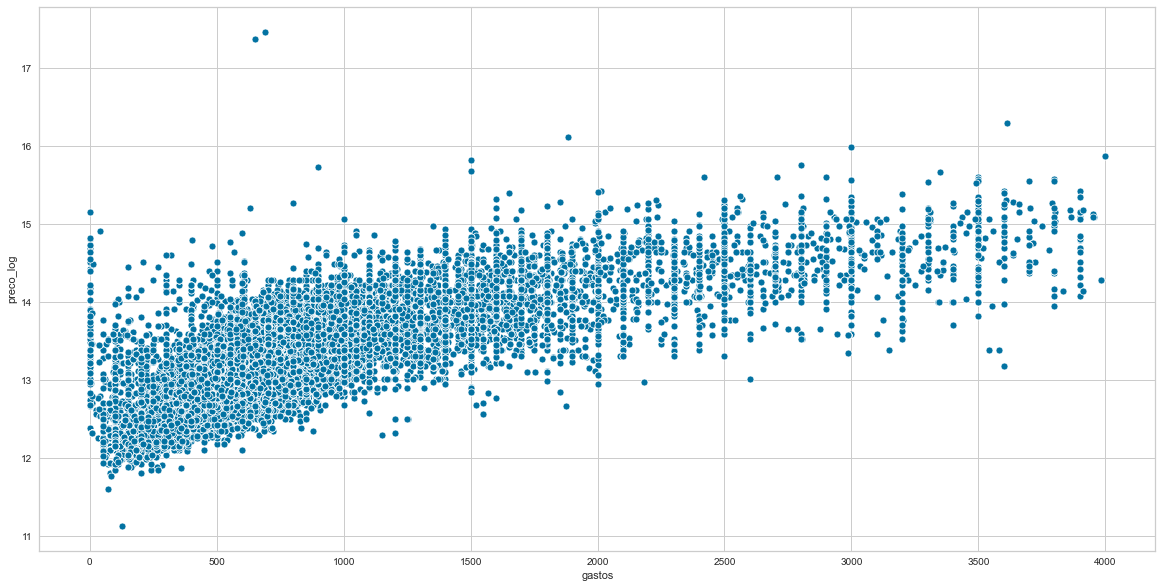

In [44]:
plt.figure(figsize=(20,10))

sns.scatterplot(x='gastos', y='preco_log', data=vendas)
plt.show()

In [46]:
vendas = vendas[ vendas.gastos >= 70 ] 

In [47]:
plt.figure(figsize=(20,10))

sns.scatterplot(x='gastos', y='preco_log', data=vendas)
plt.show()

In [48]:
corr_feature = vendas[['preco_log', 'lat', 'lon', 'area_coberta_m2', 'preco_m2', 'gastos']].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_feature, annot=True)
plt.show()

In [49]:
features_selecionadas = vendas[['area_coberta_m2', 'num_quartos', 'apartment', 'house', 'tem_vaga' , 'tem_piscina', 'comodos', 'lat', 'lon', 'gastos']].columns

In [50]:
X = vendas[features_selecionadas]
y = vendas.preco_log

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
predictables = model.predict(X_test)

In [55]:
r2_score(y_test, predictables)

0.6877896999214501

In [56]:
mean_squared_error(y_test, predictables)

0.11361313388795469

In [93]:
sns.regplot(y_test, predictables)
plt.xlabel('Preço real')
plt.ylabel('Preço Previsto')
plt.show()

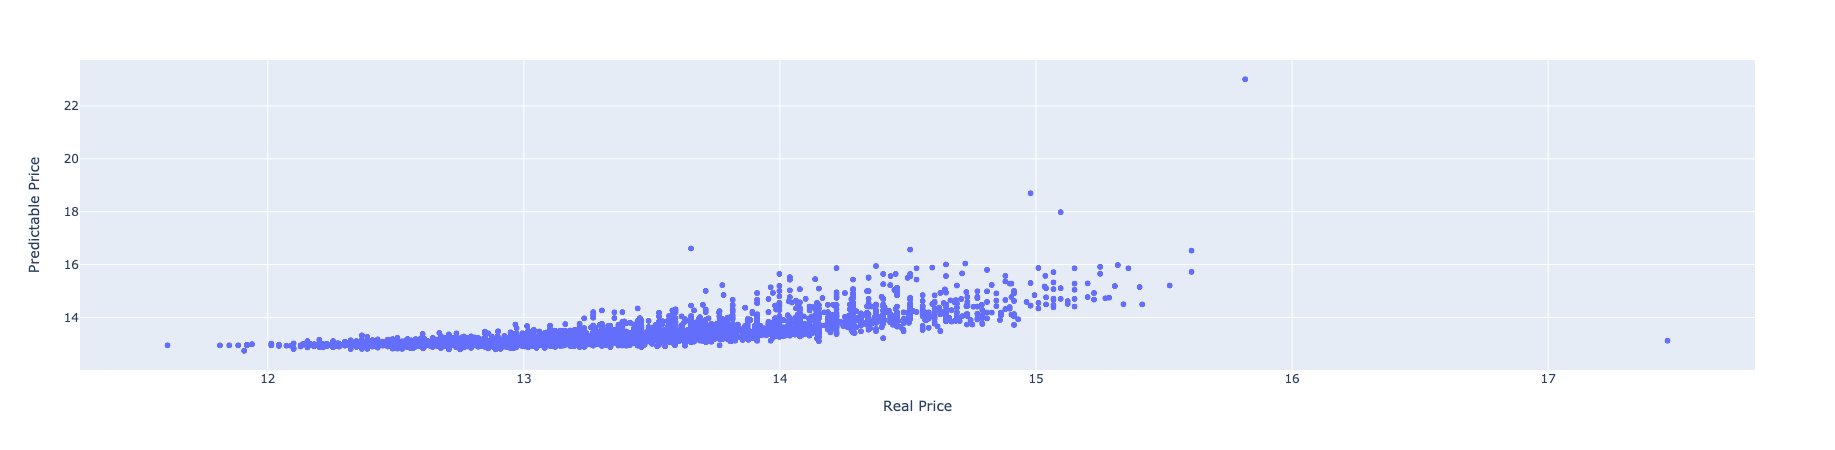

In [103]:
# On Terminal 
#> pip install plotly
#> jupyter labextension install jupyterlab-plotly
#> jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget
# Restart the jupyterlab

import plotly.express as px

real_price = y_test
predictable_price = predictables

fig = px.scatter(x=real_price, y=predictable_price, labels={'x': 'Real Price', 'y': 'Predictable Price'})
fig.show()

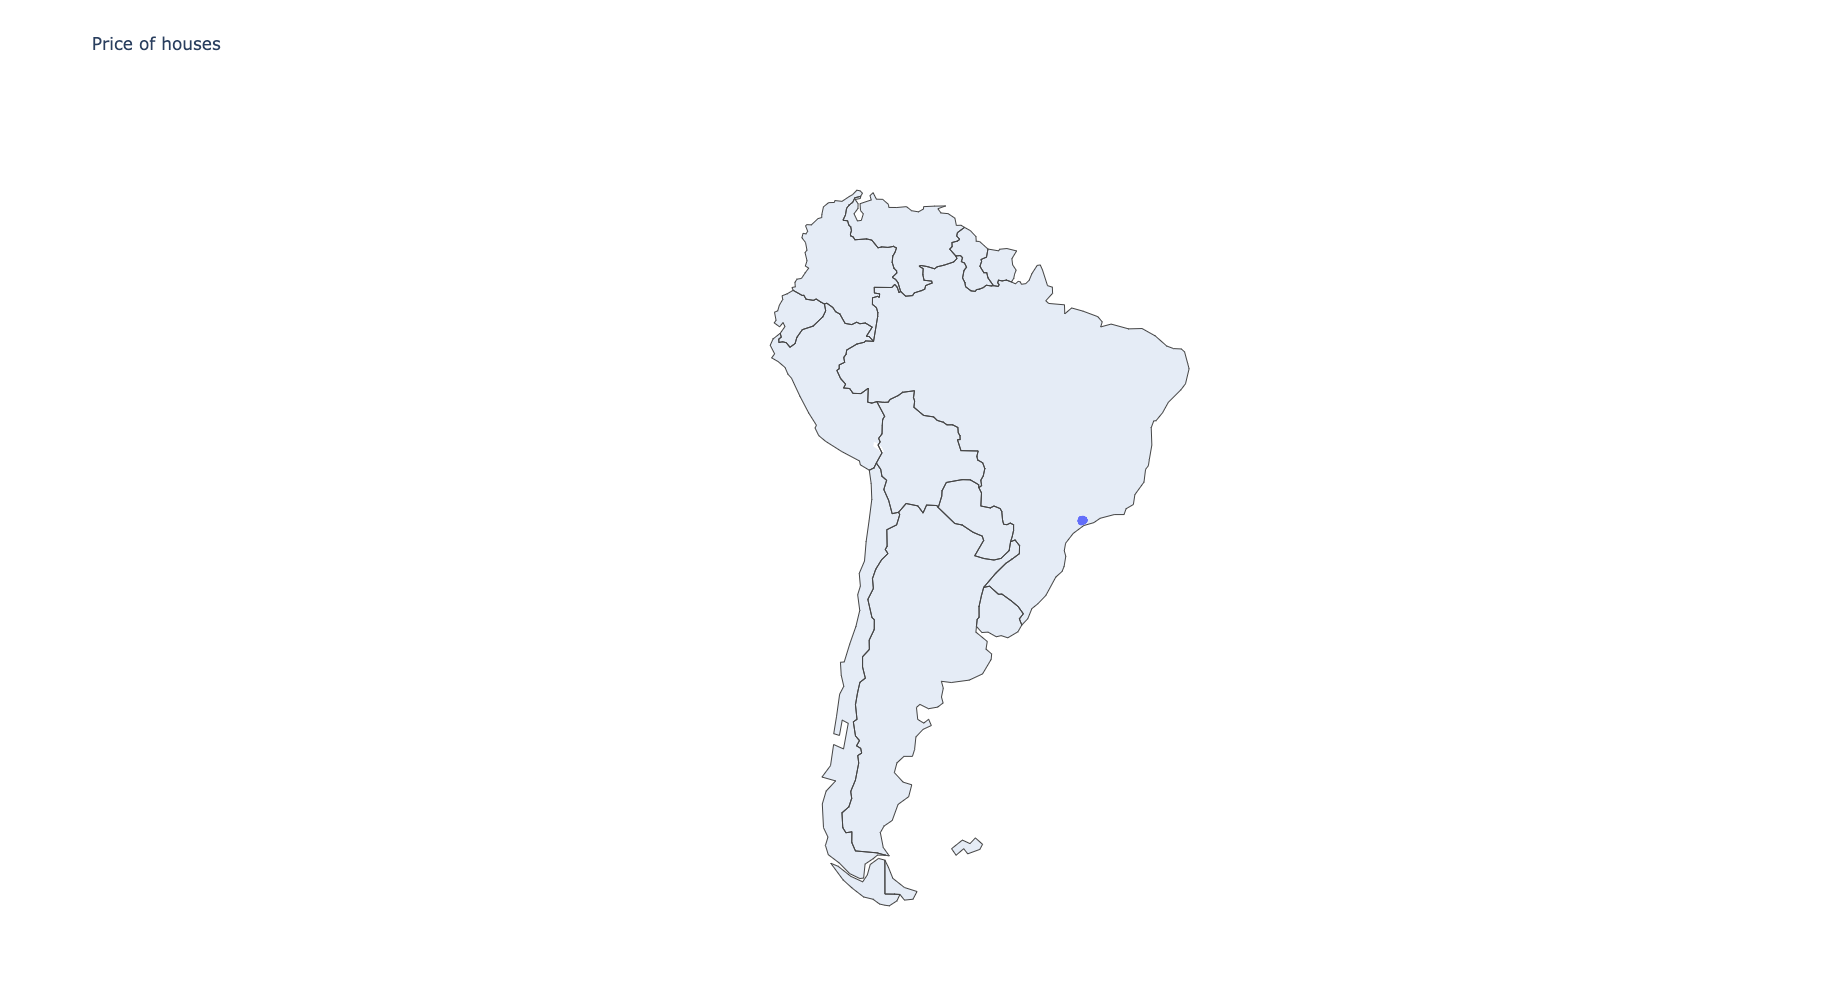

In [144]:
houses = vendas[ vendas.house == 1 ]

fig = px.scatter_geo(data_frame=houses, lat='lat', lon='lon', text='local', scope='south america', title='Price of houses', width=800, height=1000)

fig.show()

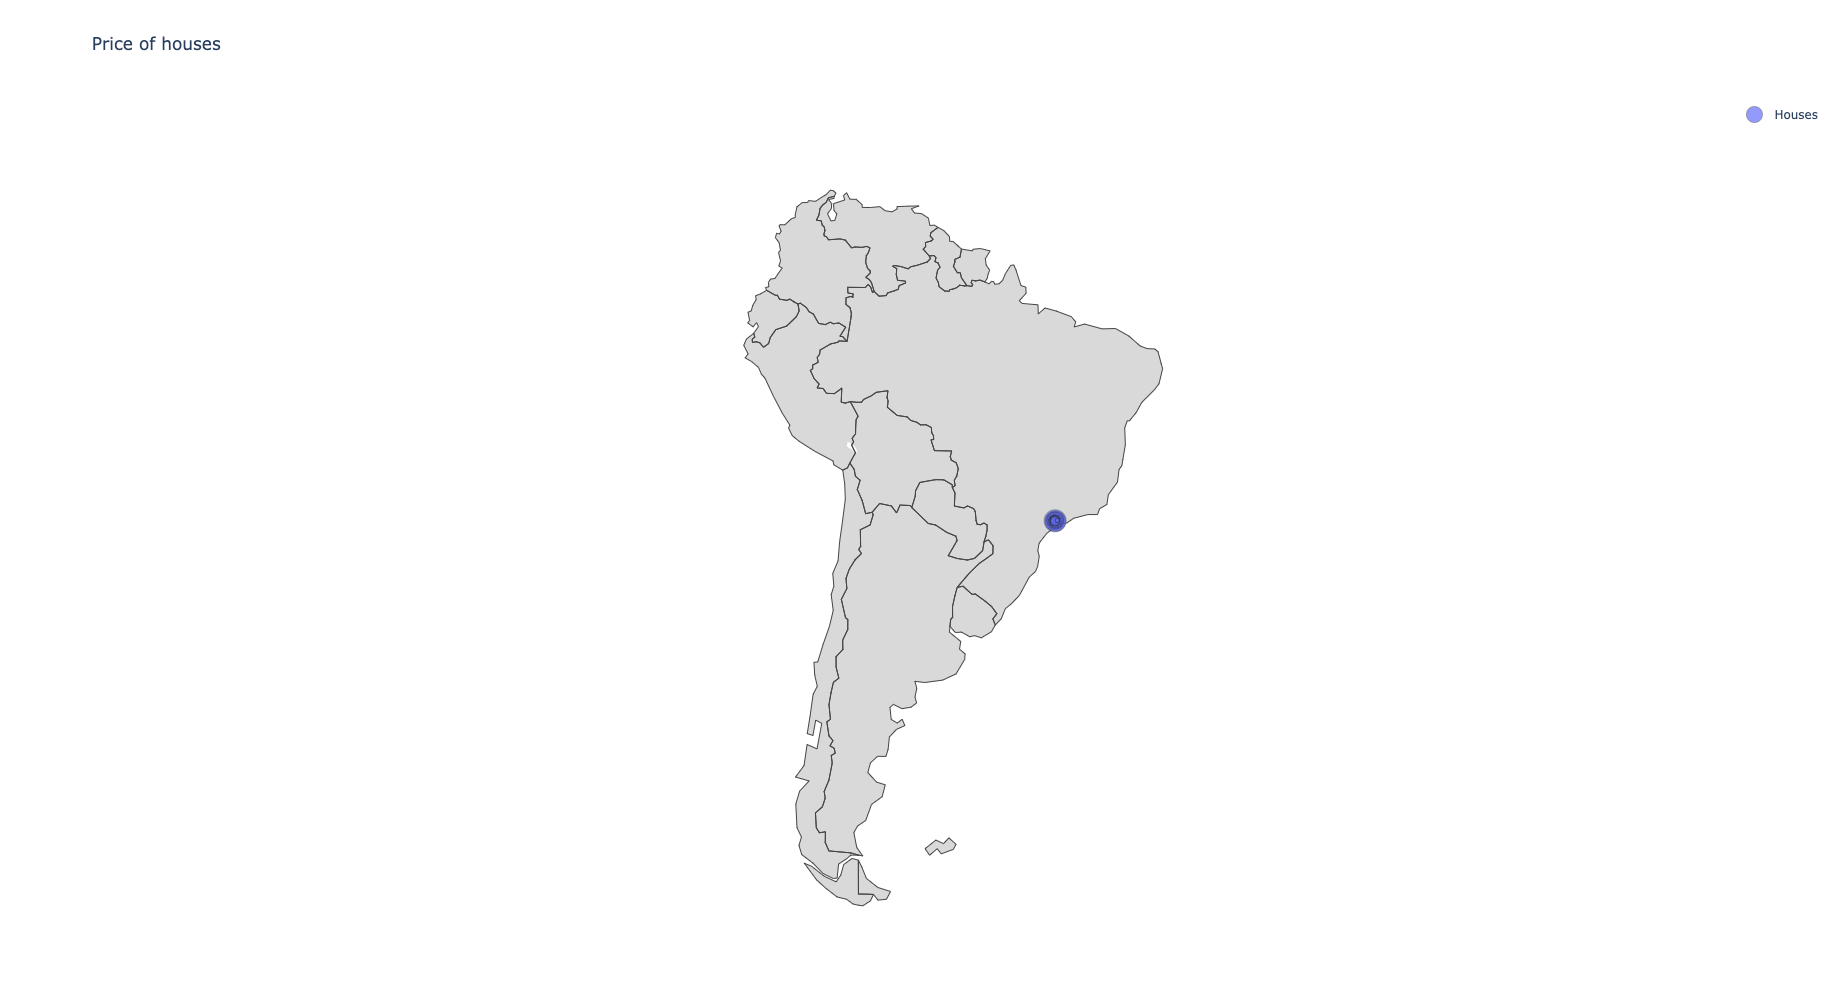

In [157]:
import plotly.graph_objects as go

scale = 50000
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon = houses['lon'],
    lat = houses['lat'],
    text = houses['local'],
    marker = dict(
        size = houses['preco']/scale,
        line_color='rgb(40,40,40)',
        line_width=0.5,
        sizemode = 'area'),
        name = "Houses",
))
fig.update_layout(
        title_text = 'Price of houses',
        showlegend = True,
        width = 800,
        height = 1000,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()